In [1]:
# Install PyCaret if not already installed
# (Run only once)
! pip install pycaret --quiet


In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import *

# Load Heart Disease dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names from dataset documentation
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names, na_values='?')

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = (df['target'] > 0).astype(int)

# Handle missing values (drop rows with missing values - only a few)
print("Missing values before handling:")
print(df.isnull().sum())
df = df.dropna()

print(f"\nDataset shape after cleaning: {df.shape}")
print(f"\nTarget distribution:")
print(df['target'].value_counts())
print(f"Class balance: {df['target'].value_counts(normalize=True).round(3)}")

print("\n=== Feature Descriptions ===")
print("age: Age in years")
print("sex: Sex (1 = male, 0 = female)")
print("cp: Chest pain type (1-4)")
print("trestbps: Resting blood pressure (mm Hg)")
print("chol: Serum cholesterol (mg/dl)")
print("fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)")
print("restecg: Resting ECG results (0-2)")
print("thalach: Maximum heart rate achieved")
print("exang: Exercise induced angina (1 = yes, 0 = no)")
print("oldpeak: ST depression induced by exercise")
print("slope: Slope of peak exercise ST segment (1-3)")
print("ca: Number of major vessels colored by fluoroscopy (0-3)")
print("thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)")
print("target: Heart disease (0 = no, 1 = yes)")

print("\nFirst few rows:")
df.head()

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Dataset shape after cleaning: (297, 14)

Target distribution:
target
0    160
1    137
Name: count, dtype: int64
Class balance: target
0    0.539
1    0.461
Name: proportion, dtype: float64

=== Feature Descriptions ===
age: Age in years
sex: Sex (1 = male, 0 = female)
cp: Chest pain type (1-4)
trestbps: Resting blood pressure (mm Hg)
chol: Serum cholesterol (mg/dl)
fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
restecg: Resting ECG results (0-2)
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes, 0 = no)
oldpeak: ST depression induced by exercise
slope: Slope of peak exercise ST segment (1-3)
ca: Number of major vessels colored by fluoroscopy (0-3)
thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversibl

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Setup PyCaret classification environment
clf = setup(
    data=df,              # Changed from train_sampled
    target='target',      # Changed from 'y'
    session_id=123,
    fix_imbalance=False,  # Dataset is fairly balanced
    normalize=True,
    verbose=False
)

In [5]:
# Compare a suite of classifiers and pick the best performer
best_model = compare_models()

# Optional: capture and inspect the leaderboard table
leaderboard = pull()
leaderboard.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8460,0.8976,0.7911,0.8632,0.8217,0.6874,0.6940,0.3110
ridge,Ridge Classifier,0.8267,0.8960,0.7389,0.8658,0.7903,0.6461,0.6583,0.0040
nb,Naive Bayes,0.8262,0.8875,0.7700,0.8424,0.7999,0.6478,0.6554,0.1450
lda,Linear Discriminant Analysis,0.8217,0.8970,0.7278,0.8640,0.7830,0.6354,0.6486,0.0040
et,Extra Trees Classifier,0.8217,0.8900,0.7889,0.8183,0.7968,0.6377,0.6466,0.0170
ada,Ada Boost Classifier,0.8124,0.8462,0.7933,0.8025,0.7930,0.6224,0.6287,0.0090
knn,K Neighbors Classifier,0.8067,0.8535,0.7556,0.8106,0.7791,0.6072,0.6116,0.1550
catboost,CatBoost Classifier,0.8026,0.8814,0.7589,0.7965,0.7748,0.5995,0.6032,0.0970
rf,Random Forest Classifier,0.7979,0.8890,0.7256,0.8097,0.7607,0.5865,0.5926,0.1550
lightgbm,Light Gradient Boosting Machine,0.7893,0.8705,0.7589,0.7815,0.7674,0.5734,0.5769,0.1350


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8460,0.8976,0.7911,0.8632,0.8217,0.6874,0.6940,0.311
ridge,Ridge Classifier,0.8267,0.8960,0.7389,0.8658,0.7903,0.6461,0.6583,0.004
nb,Naive Bayes,0.8262,0.8875,0.7700,0.8424,0.7999,0.6478,0.6554,0.145
lda,Linear Discriminant Analysis,0.8217,0.8970,0.7278,0.8640,0.7830,0.6354,0.6486,0.004
et,Extra Trees Classifier,0.8217,0.8900,0.7889,0.8183,0.7968,0.6377,0.6466,0.017


In [6]:
# Evaluate the best-performing model using interactive dashboard
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

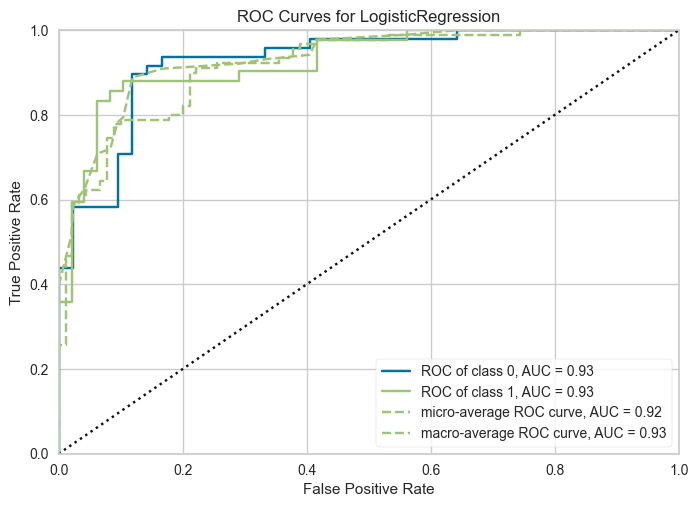

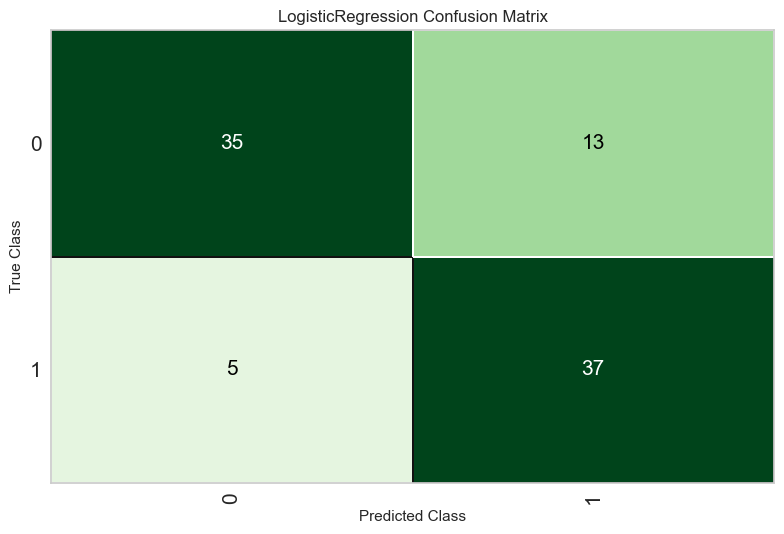

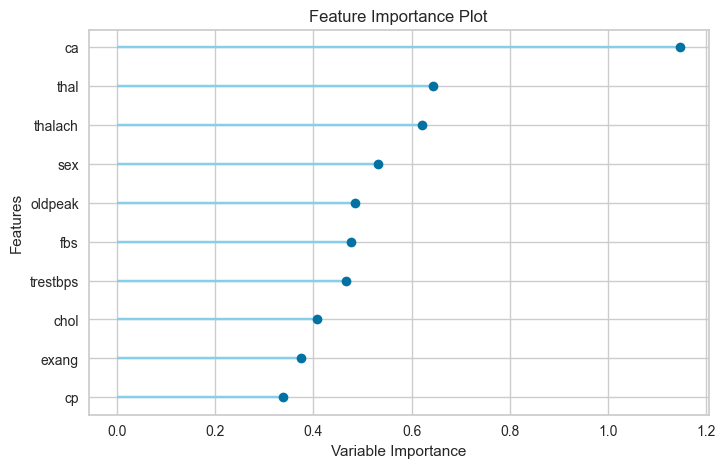

In [7]:
# ROC curve
plot_model(best_model, plot='auc')

# Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

# Feature Importance
plot_model(best_model, plot='feature')


In [8]:
# Predict on the internal hold-out set (from setup's train/validation split)
holdout_predictions = predict_model(best_model)

# Peek at predictions (original features + Label and Score columns)
holdout_predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8000,0.9271,0.8810,0.7400,0.8043,0.6029,0.6126


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
173,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0,0,0.5536
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0,1,0.8311
45,58.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,1,1,0.7939
107,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,1,1,0.7882
227,67.0,0.0,3.0,152.0,277.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0,0,0,0.8864


In [9]:
# Make predictions on validation set (no separate test file)
from pycaret.classification import get_config

X_test = get_config('X_test')
y_test = get_config('y_test')

# Create validation dataframe
validation_data = X_test.copy()
validation_data['target'] = y_test.values

# Make predictions
validation_predictions = predict_model(best_model, data=validation_data)

print("Validation predictions:")
print(validation_predictions[['target', 'prediction_label', 'prediction_score']].head(10))

# Show prediction accuracy
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(validation_predictions['target'], 
                           validation_predictions['prediction_label']))

print("\nConfusion Matrix:")
print(confusion_matrix(validation_predictions['target'], 
                      validation_predictions['prediction_label']))

# Save predictions
validation_predictions.to_csv("validation_predictions.csv", index=False)
print("\n✅ Saved validation predictions to validation_predictions.csv")

Validation predictions:
     target  prediction_label  prediction_score
173       0                 0            0.5536
152       0                 1            0.8311
45        1                 1            0.7939
107       1                 1            0.7882
227       0                 0            0.8864
86        0                 0            0.7896
117       0                 0            0.9573
183       0                 1            0.9635
46        0                 0            0.9003
5         0                 0            0.9633

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        48
           1       0.74      0.88      0.80        42

    accuracy                           0.80        90
   macro avg       0.81      0.81      0.80        90
weighted avg       0.81      0.80      0.80        90


Confusion Matrix:
[[35 13]
 [ 5 37]]

✅ Saved validation predictions to validation_predictions.c

In [10]:
# Finalize model (retrain on full dataset)
final_model = finalize_model(best_model)

# Save the final model
save_model(final_model, 'heart_disease_model')

print("✅ Model saved as 'heart_disease_model.pkl'")

# Load and test
loaded_model = load_model('heart_disease_model')
print("✅ Model loaded successfully!")

# Make sample predictions
sample = df.head(5)
sample_preds = predict_model(loaded_model, data=sample)
print("\nSample predictions:")
print(sample_preds[['target', 'prediction_label', 'prediction_score']])

Transformation Pipeline and Model Successfully Saved
✅ Model saved as 'heart_disease_model.pkl'
Transformation Pipeline and Model Successfully Loaded
✅ Model loaded successfully!


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000



Sample predictions:
   target  prediction_label  prediction_score
0       0                 0            0.7142
1       1                 1            0.9967
2       1                 1            0.9903
3       0                 0            0.6805
4       0                 0            0.9737


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7364,0.6000,0.6667,0.6316,0.3288,0.3303
1,0.7619,0.7955,0.7000,0.7778,0.7368,0.5205,0.5230
2,0.8095,0.9273,0.8000,0.8000,0.8000,0.6182,0.6182
3,0.9524,0.9909,0.9000,1.0000,0.9474,0.9041,0.9083
4,0.7619,0.8818,0.7000,0.7778,0.7368,0.5205,0.5230
5,0.7619,0.8704,0.6667,0.7500,0.7059,0.5070,0.5095
6,0.7143,0.8241,0.4444,0.8000,0.5714,0.3824,0.4196
7,0.9500,1.0000,1.0000,0.9000,0.9474,0.9000,0.9045
8,0.7500,0.9040,0.6667,0.7500,0.7059,0.4898,0.4924


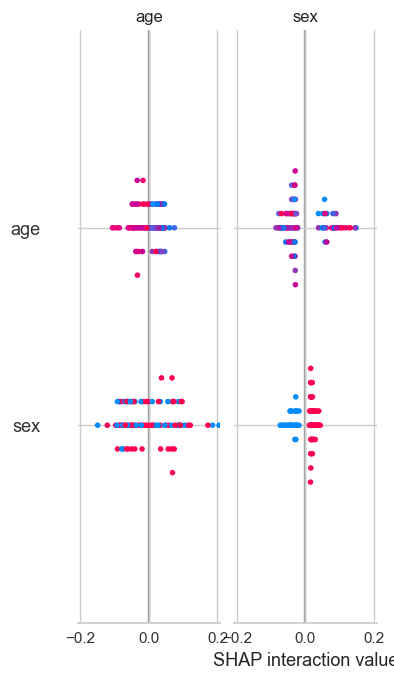

In [11]:
# Optional: SHAP summary via a tree model (works for rf, xgboost, lightgbm, dt, et, catboost)
try:
    interpret_model(best_model)  # will work if best_model is tree-based
except TypeError:
    # Train a quick Random Forest just for SHAP
    rf_model = create_model('rf')
    interpret_model(rf_model)


,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8460,0.8976,0.7911,0.8632,0.8217,0.6874,0.6940
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8067,0.8535,0.7556,0.8106,0.7791,0.6072,0.6116
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.8262,0.8875,0.7700,0.8424,0.7999,0.6478,0.6554
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.6914,0.6897,0.6922,0.6464,0.6631,0.3763,0.3816
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.7440,0.8414,0.7056,0.7311,0.7140,0.4830,0.4878
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8267,0.8960,0.7389,0.8658,0.7903,0.6461,0.6583
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7979,0.8890,0.7256,0.8097,0.7607,0.5865,0.5926
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.7681,0.8647,0.7144,0.7617,0.7350,0.5290,0.5326
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8124,0.8462,0.7933,0.8025,0.7930,0.6224,0.6287


AutoML-selected   model (by AUC): LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


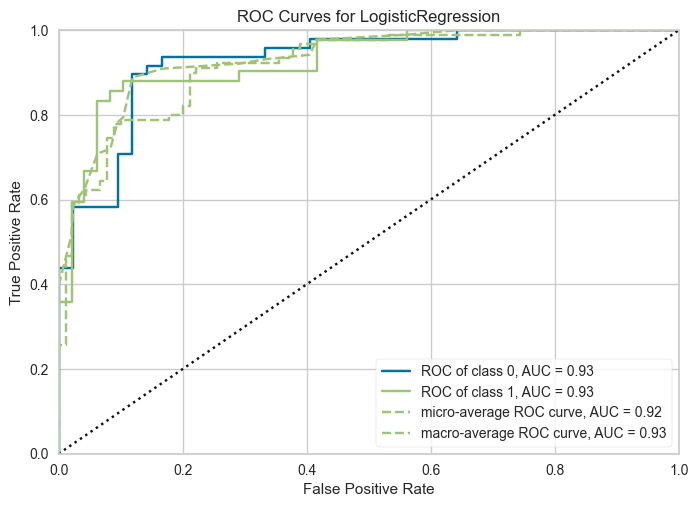

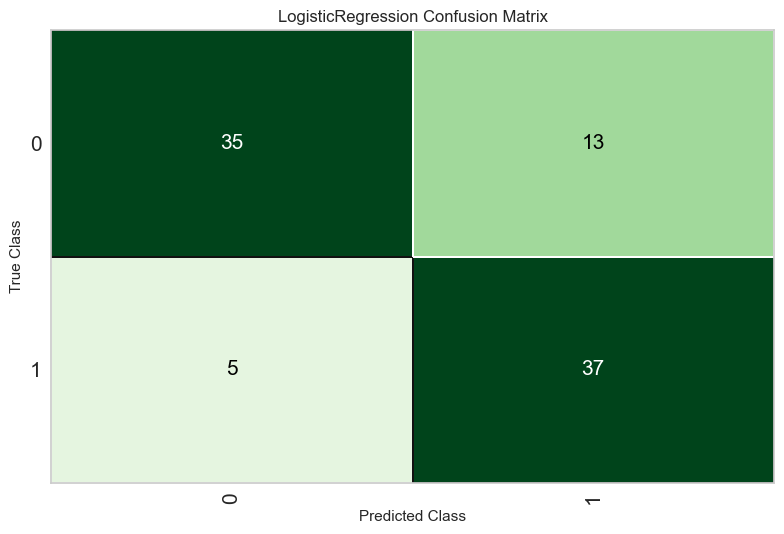

In [12]:
# Leaderboard of all models tried so far
lb = get_leaderboard()
display(lb.head(10))

# Optional: have AutoML select the best model for a chosen metric (AUC here)
best_auc_model = automl(optimize='AUC')
print("AutoML-selected   model (by AUC):", best_auc_model)

# Quick peek at its ROC curve and confusion matrix
plot_model(best_auc_model, plot='auc')
plot_model(best_auc_model, plot='confusion_matrix')
